# 📊 Step 1: Dataset Exploration

This notebook loads the student performance dataset and performs initial exploratory data analysis (EDA).

**Dataset:** `data/raw/student-mat.csv`

## Tasks
1. Import necessary libraries (pandas, matplotlib, seaborn)
2. Load the dataset into a DataFrame
3. Display basic structure: shape, head, info, describe
4. Check for missing/null values
5. Plot distributions of G1, G2, G3 (student grades)
6. Visualize correlation matrix using a heatmap
7. Compare studytime, failures, absences, and other key features


In [1]:
# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

In [2]:
# 2. Load the dataset into a DataFrame
# Try loading with default delimiter, if G1 not found, try with ';' delimiter
try:
    df = pd.read_csv('../data/raw/student-mat.csv')
    if 'G1' not in df.columns:
        raise ValueError('G1 not found, trying semicolon delimiter')
except Exception:
    df = pd.read_csv('../data/raw/student-mat.csv', delimiter=';')
print('Dataset loaded successfully!')
print('Columns:', df.columns.tolist())
print(df.head())

Dataset loaded successfully!
Columns: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5     

In [3]:
# 3. Display basic structure: shape, head, info, describe
print('Shape:', df.shape)
print(df.head())
print('\nInfo:')
df.info()
print('\nDescribe:')
print(df.describe())

Shape: (395, 33)
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0

In [4]:
# 4. Check for missing/null values
missing = df.isnull().sum()
print('Missing values per column:')
print(missing[missing > 0] if missing.sum() > 0 else 'No missing values found.')

Missing values per column:
No missing values found.


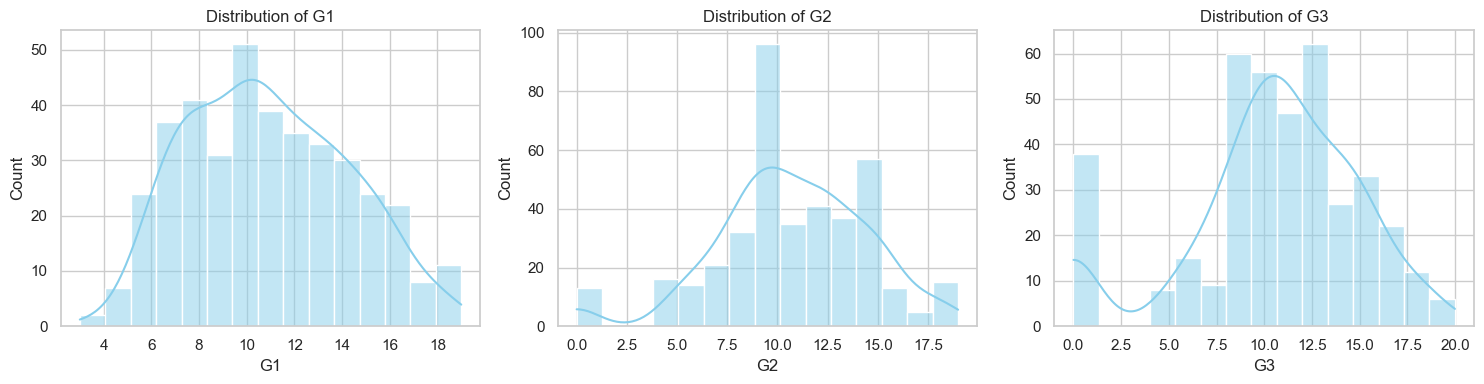

In [5]:
# 5. Plot distributions of G1, G2, G3 (student grades)
grade_cols = ['G1', 'G2', 'G3']
plt.figure(figsize=(15, 4))
for i, col in enumerate(grade_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, bins=15, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

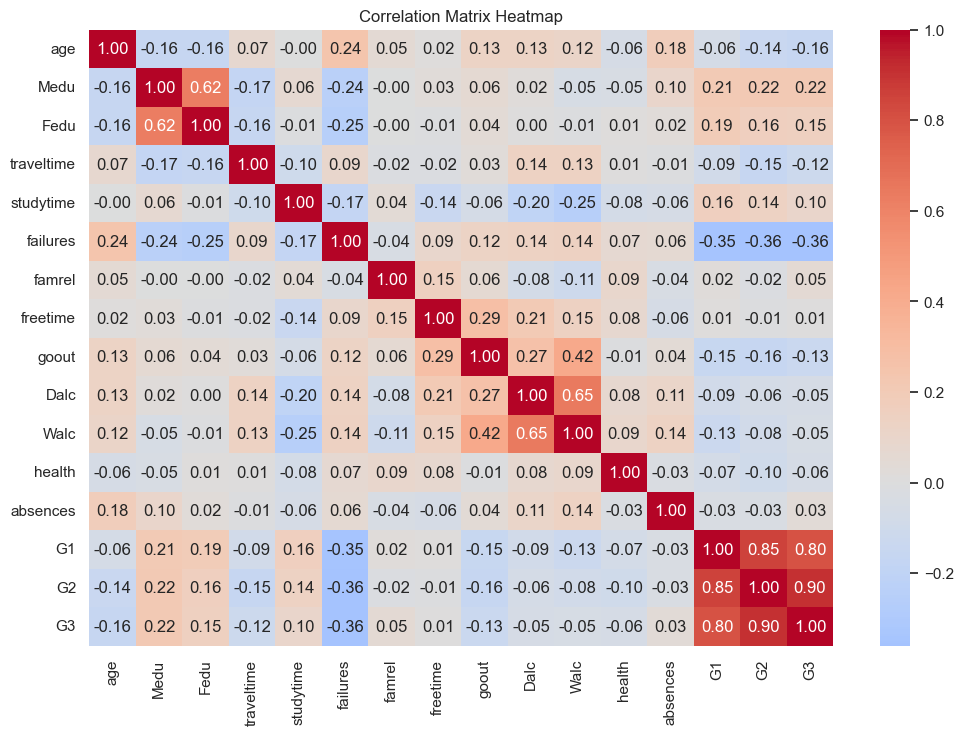

In [6]:
# 6. Visualize correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

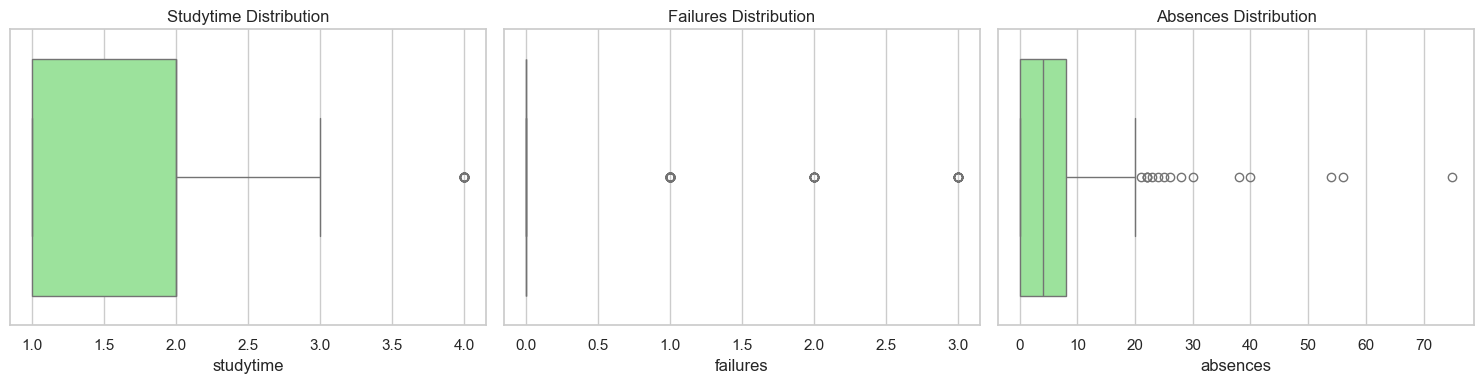

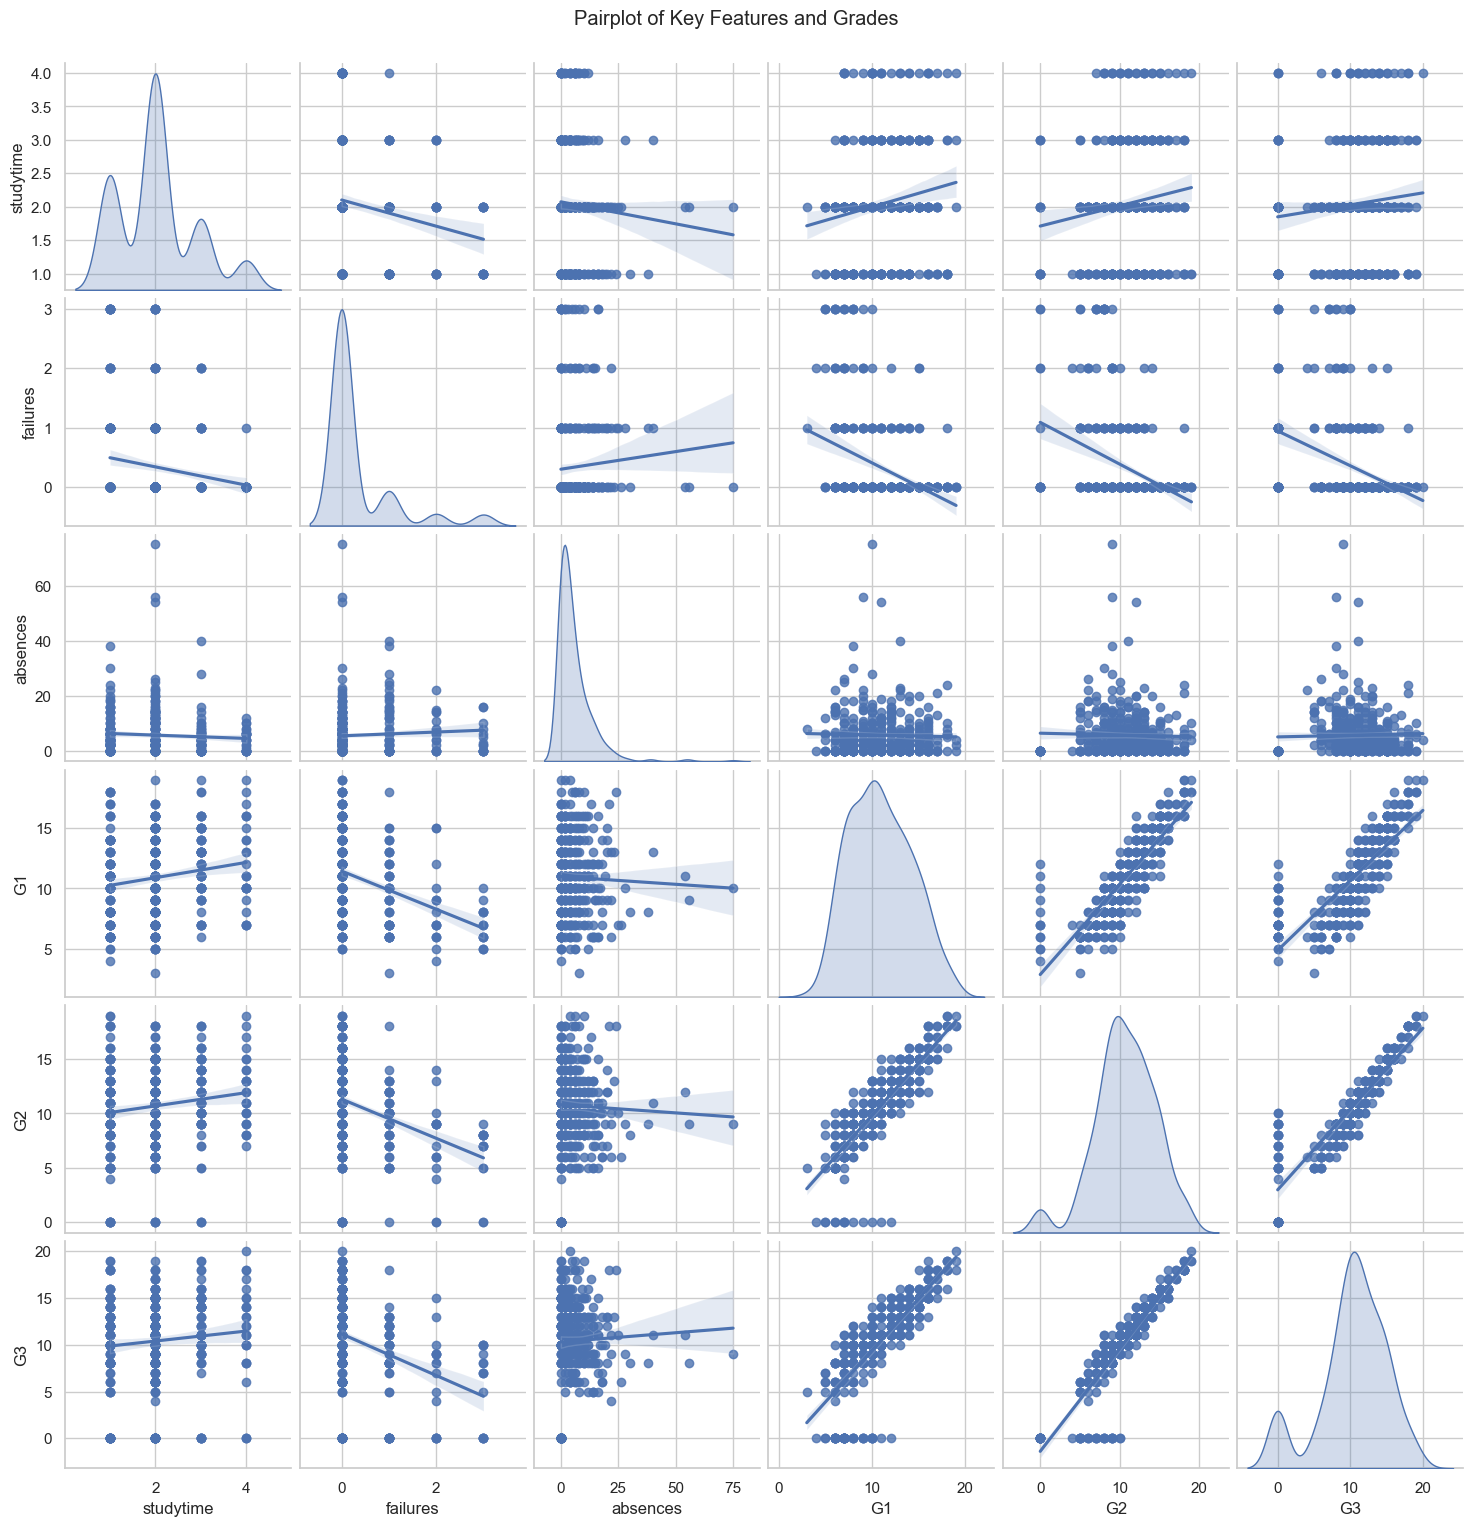

In [7]:
# 7. Compare studytime, failures, absences, and other key features
features = ['studytime', 'failures', 'absences']
plt.figure(figsize=(15, 4))
for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'{col.capitalize()} Distribution')
plt.tight_layout()
plt.show()

# Pairplot for selected features and grades
sns.pairplot(df, vars=features + ['G1', 'G2', 'G3'], kind='reg', diag_kind='kde')
plt.suptitle('Pairplot of Key Features and Grades', y=1.02)
plt.show()